In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import os

ModuleNotFoundError: No module named 'numpy'

In [ ]:
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dirs = ["train", "valid", "test", "images to test"]
path = Path.cwd()
train_dir = str(path) + "\\" + dirs[0]
val_dir = str(path) + "\\" + dirs[1]
test_dir = str(path) + "\\" + dirs[2]

batch_size = 32

def generate(dataset):
    gen = ImageDataGenerator( rescale = 1.0/255. )
    x = gen.flow_from_directory(
        directory = dataset,
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='categorical',
        target_size=(224,224)
    )
    return x

train_data = generate(train_dir)
val_data = generate(val_dir)
test_data = generate(test_dir)

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [ ]:
model_V2 = tf.keras.models.load_model('good_V2_model.h5')

In [ ]:
model_V2.evaluate(test_data)

63/63 [==============================] - 42s 649ms/step - loss: 1.7010 - accuracy: 0.9090


[1.7010095119476318, 0.9089999794960022]

In [ ]:
import random

def load_and_prep_image(filename, img_shape = 224):
    img = tf.io.read_file(filename) #read image
    img = tf.image.decode_image(img) # decode the image to a tensor
    img = tf.image.resize(img, size = [img_shape, img_shape])
    img = img/255.
    return img

# Singuar check
def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round
        
    #plt.imshow(img)
    #plt.title("Prediction: " + str(pred_class))
    #plt.axis(False);
        
    return pred_class

# Evaluation over 100 images
def evaluation_100(model):
    good = 0
    for i in range(100):
        idx=random.randint(0,399)
        test_image = test_dir + "\\" + str(names[idx]) + "\\1.jpg"
        pred_class = pred_and_plot(model, test_image, names)
        if (names[idx] == pred_class):
            good += 1
    return good

In [ ]:
#check random picture
idx=random.randint(0,400)
names = os.listdir(dirs[0])
file = test_dir + "\\" + str(names[idx]) + "\\1.jpg"
pred = pred_and_plot(model_V2, file, names)

print( pred,  names[idx]==pred )


1/1 [==============================] - 0s 87ms/step
VIOLET GREEN SWALLOW True


1/1 [==============================] - 0s 93ms/step
96 good guesses out of 100


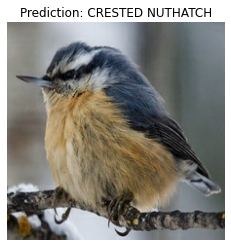

In [ ]:
#check 100 pictures
n = evaluation_100(model_V2)
print( n, 'good guesses out of 100' )